In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

In [2]:
##install and import pandasdatareader
!pip install pandas_datareader
from pandas_datareader import data as pdr
##install and import yfinance
!pip install yfinance
import yfinance as yfin
yfin.pdr_override()

In [3]:
#load lickers variable for Coca Cola
ticker = ['KO'] ##KO 

In [37]:
##Set start and end date
start_date = '2019-04-04'
end_date = '2023-04-04'

In [38]:
ticker = 'KO'
df_yf = pdr.get_data_yahoo(ticker,start=start_date,end=end_date)['Close'].to_frame()
df_yf

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2019-01-02,46.930000
2019-01-03,46.639999
2019-01-04,47.570000
2019-01-07,46.950001
2019-01-08,47.480000
...,...
2023-03-28,61.419998
2023-03-29,61.860001
2023-03-30,61.849998


In [39]:
df_yf.head()

,Close
Date,
2019-01-02,46.930000
2019-01-03,46.639999
2019-01-04,47.570000
2019-01-07,46.950001
2019-01-08,47.480000


In [40]:
print(df_yf.describe())

             Close
count  1071.000000
mean     54.503613
std       5.743556
min      37.560001
25%      49.875000
50%      54.259998
75%      59.594999
max      66.209999


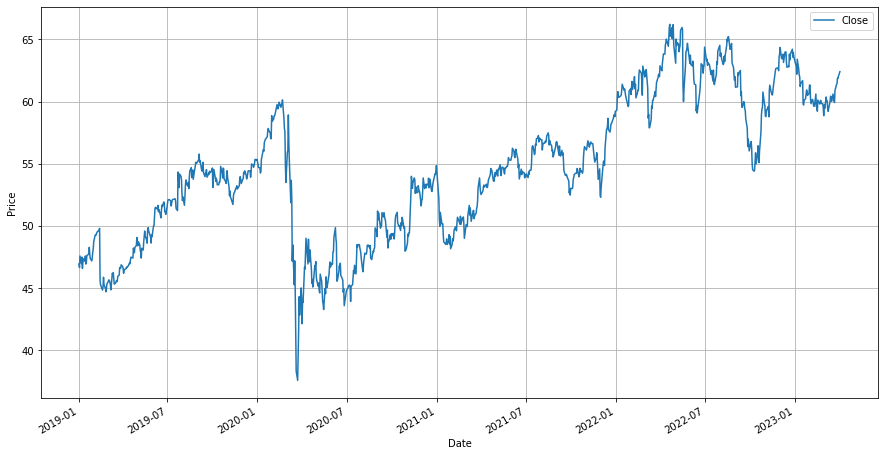

In [41]:
##Plot graph for price changes
df_yf.plot(figsize = (15, 8))
plt.grid()
plt.ylabel("Price")
plt.show()

In [42]:
# create 20 days exponential moving average column
df_yf['EMA20'] = df_yf['Close'].ewm(span=20, adjust=False).mean()
print(df_yf.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1071 entries, 2019-01-02 to 2023-04-03
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1071 non-null   float64
 1   EMA20   1071 non-null   float64
dtypes: float64(2)
memory usage: 25.1 KB
None


In [43]:
# create 50 days exponential moving average column
df_yf['EMA50'] = df_yf['Close'].ewm(span=50, adjust=False).mean()
print(df_yf.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1071 entries, 2019-01-02 to 2023-04-03
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1071 non-null   float64
 1   EMA20   1071 non-null   float64
 2   EMA50   1071 non-null   float64
dtypes: float64(3)
memory usage: 33.5 KB
None


In [44]:
df_yf['Signal'] = 0.0  
df_yf['Signal'] = np.where(df_yf['EMA20'] > df_yf['EMA50'], 1.0, 0.0)

In [45]:
df_yf['Position'] = df_yf['Signal'].diff()

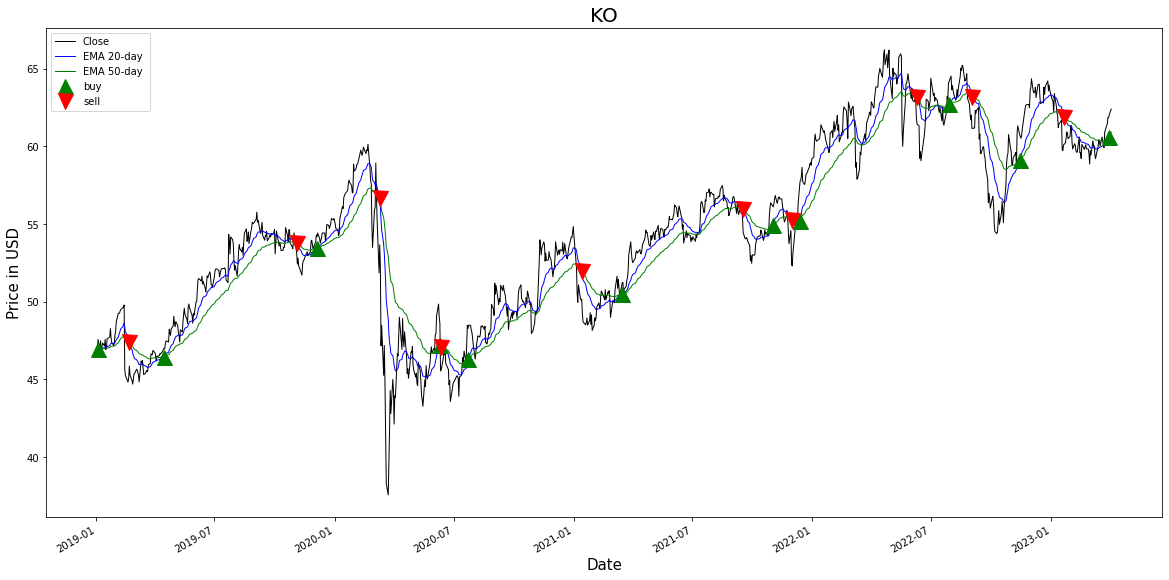

<Figure size 432x288 with 0 Axes>

In [46]:
plt.figure(figsize = (20, 10))
# plot close price, short-term and long-term moving averages 
df_yf['Close'].plot(color = 'k', lw = 1, label = 'Close')  
df_yf['EMA20'].plot(color = 'b', lw = 1, label = 'EMA 20-day ') 
df_yf['EMA50'].plot(color = 'g', lw = 1, label = 'EMA 50-day ')
# plot ‘buy’ and 'sell' signals
plt.plot(df_yf[df_yf['Position'] == 1].index, 
         df_yf['EMA20'][df_yf['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
plt.plot(df_yf[df_yf['Position'] == -1].index, 
         df_yf['EMA50'][df_yf['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in USD', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('KO' , fontsize = 20)
plt.legend()
plt.figure()
plt.show()


In [47]:
df_position = df_yf[(df_yf['Position'] == 1) | (df_yf['Position'] == -1)]
df_position['Position'] = df_position['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position, headers = 'keys', tablefmt = 'psql'))

+---------------------+---------+---------+---------+----------+------------+
| Date                |   Close |   EMA20 |   EMA50 |   Signal | Position   |
|---------------------+---------+---------+---------+----------+------------|
| 2019-01-04 00:00:00 |   47.57 | 46.966  | 46.9442 |        1 | Buy        |
| 2019-02-21 00:00:00 |   45.86 | 47.3362 | 47.4133 |        0 | Sell       |
| 2019-04-15 00:00:00 |   47    | 46.4683 | 46.4644 |        1 | Buy        |
| 2019-11-05 00:00:00 |   52.42 | 53.7604 | 53.7789 |        0 | Sell       |
| 2019-12-05 00:00:00 |   54.19 | 53.4816 | 53.463  |        1 | Buy        |
| 2020-03-10 00:00:00 |   53.66 | 56.5158 | 56.6772 |        0 | Sell       |
| 2020-06-10 00:00:00 |   48.62 | 47.2046 | 47.1423 |        1 | Buy        |
| 2020-06-11 00:00:00 |   45.54 | 47.046  | 47.0794 |        0 | Sell       |
| 2020-07-23 00:00:00 |   48.28 | 46.2913 | 46.272  |        1 | Buy        |
| 2021-01-13 00:00:00 |   50.16 | 51.9455 | 51.9759 |        0 |